In [6]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import os
import numpy as np
import pandas as pd

In [10]:
SR = pd.read_csv('../data/MMM_serial.csv', header=None)
PR = pd.read_csv('../data/MMM_parallel.csv', header=None)
HR = pd.read_csv('../data/MMM_hybrid.csv', header=None)

SR.rename(columns={0: 'Threads', 1: 'Size', 2: 'Time'}, inplace=True)
PR.rename(columns={0: 'Threads', 1: 'Size', 2: 'Time'}, inplace=True)
HR.rename(columns={0: 'Size', 1: 'Tasks', 2: 'Threads', 3 :'Time'}, inplace=True)

serial_results_avg = SR.groupby(['Threads','Size'])['Time'].mean().reset_index()
openmp_results_avg = PR.groupby(['Threads','Size'])['Time'].mean().reset_index()
hybrid_results_avg = HR.groupby(['Size','Tasks','Threads'])['Time'].mean().reset_index()

In [31]:
def Mean(X):
    # This function calculates the mean of the 80% middle data.
    Start = int(len(X) * 0.1)
    End   = int(len(X) * 0.9)
    return np.mean(X[Start:End])

## Part 1: Q1: Serial run vs parallel with one thread.

In [11]:
SR

,Threads,Size,Time
0,1,20,0.000059
1,1,20,0.000058
2,1,20,0.000059
3,1,20,0.000056
4,1,20,0.000056
5,1,20,0.000055
6,1,20,0.000053
7,1,20,0.000056
8,1,20,0.000056
9,1,20,0.000050


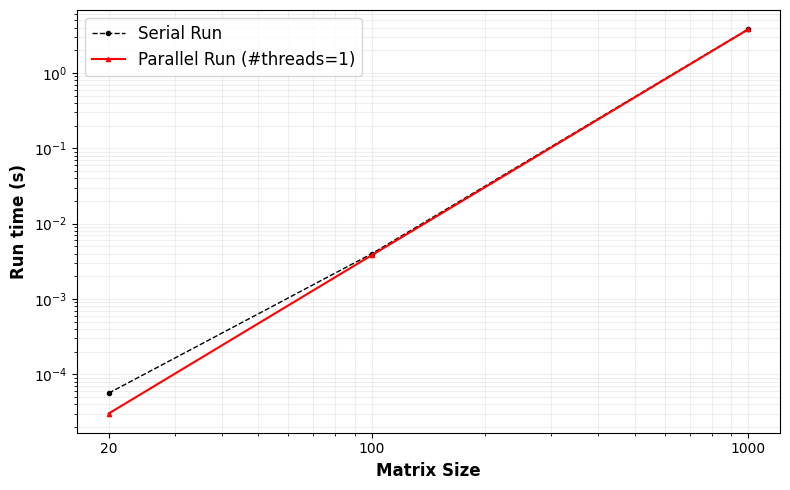

In [32]:
# Extract the data.
Sizes = SR.Size.unique()
Serial, Parallel = [], []
for ss in Sizes:
    Serial.append(Mean(SR[SR.Size == ss]['Time'].to_numpy()))
    Parallel.append(Mean(PR[(PR.Size == ss) & (PR.Threads == 1)]['Time'].to_numpy()))

fig = plt.figure(figsize=(8, 5))
plt.loglog(Sizes, Serial, ls='--', lw=1, color='k', marker='o', ms=3, label='Serial Run')
plt.loglog(Sizes, Parallel, ls='-', lw=1.5, color='r', marker='^', ms=3, label='Parallel Run (#threads=1)')

plt.xlabel('Matrix Size', fontsize=12, color='k', fontweight='bold')
plt.ylabel('Run time (s)', fontsize=12, color='k', fontweight='bold')
plt.legend(fontsize=12, fancybox=True)
plt.grid(which='both', alpha=0.2)
plt.xticks([20, 100, 1000])
plt.gca().set_xticklabels(['20', '100', '1000'])
fig.tight_layout()
fig.savefig('Fig01_Serial_Thread1.png', format='png', dpi=800)


In [29]:
Serial

[5.5820300000000005e-05, 0.0040926159999999994, 3.799619]

In [30]:
Parallel

[3.11048e-05, 0.003797731, 3.771361]